<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 8: *Unsupervised Learning (Clustering)***

### **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab8_1234567890_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 19 Mei 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [69]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://medium.com/@Suraj_Yadav/understanding-intra-cluster-distance-inter-cluster-distance-and-dun-index-a-comprehensive-guide-a8de726f5769"]

In [70]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


## Import Library

In [4]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

## Intro to Clustering
Clustering merupakan bagian dari unsupervised learning. Proses yang dilakukan adalah mengelompokkan data points ke dalam beberapa grup/klaster. Harapannya adalah objek pada klaster yang sama akan memiliki similarity yang tinggi. Sebaliknya, objek yang berada di klaster berbeda akan memiliki similarity yang rendah. Berbeda dengan supervised learning yang datanya sudah memiliki label yang bersesuaian, algoritma clustering tidak secara eksplisit menjelaskan makna tiap klaster. Oleh karena itu, tiap-tiap klaster tersebut perlu diinterpretasikan sendiri.

Algoritma clustering yang akan digunakan untuk lab ini adalah **K-Means** dan **Hierarchical** atau Agglomerative clustering. Berikut adalah penjelasan singkat mengenai keduanya:
1) **K-Means** membagi data menjadi K kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.
2) **Hierarchical Clustering** membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai dendrogram, yang memungkinkan analisis tingkat hierarki.

Mari kita lihat penerapan clustering menggunakan Scikit-Learn.

### K-Means Clustering

**Penjelasan Dataset**

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| marital_status | Status pernikahan |
| income               | Pendapatan tahunan (USD)        |
| num_store_purchases  | Jumlah pembelian melalui toko offline     |
> Dataset merupakan adaptasi dan modifikasi dari https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis dan Lab 9 KASDD Genap 22/23

In [5]:
# Load dataset
df = pd.read_csv('data_pelanggan_supermarket2.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,income,num_store_purchases,marital_status
0,58138.0,4,Single
1,46344.0,2,Single
2,71613.0,10,Together
3,26646.0,4,Together
4,58293.0,6,Married


In [6]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (500, 3)


In [7]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               500 non-null    float64
 1   num_store_purchases  500 non-null    int64  
 2   marital_status       500 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,income,num_store_purchases
count,500.000000,500.000000
mean,51387.664000,5.800000
std,21245.949246,3.306034
min,2447.000000,0.000000
25%,34284.000000,3.000000
50%,50898.000000,5.000000
75%,67320.000000,8.000000
max,157243.000000,13.000000


Pada tahap ini, kita bisa melakukan imputasi data yang kosong, menghilangkan duplikat, dan menghapus outlier. Namun, hal ini tidak perlu kita lakukan pada dataset ini karena dataset tersebut sudah bersih.

Hal yang perlu dilakukan selanjutnya adalah melakukan standarisasi dan encoding kolom kategorikal.

In [9]:
# Melakukan Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_attributes = ['income', 'num_store_purchases']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_attributes]), columns=numerical_attributes)
df_std['marital_status'] = df['marital_status']  # Membiarkan dulu atribut kategorikal
df_std.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,Single
1,-0.237632,-1.150565,Single
2,0.952915,1.271677,Together
3,-1.165702,-0.545004,Together
4,0.325344,0.060556,Married


In [10]:
# Melakukan Encoding
print(f"Jumlah label unik dari marital status: {df['marital_status'].nunique()}")
print(f"{df['marital_status'].unique()}\n")

Jumlah label unik dari marital status: 6
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']



In [11]:
from category_encoders import OrdinalEncoder

marital_map =[{'col': 'marital_status',
             'mapping':{'Single': 1,
                        'Alone': 1,
                        'Together': 2,
                        'Married': 3,
                        'Divorced': 4,
                        'Widow': 5,}
            }]

enc2 = OrdinalEncoder(mapping=marital_map)
df_enc = enc2.fit_transform(df_std)

df_enc.head()

,income,num_store_purchases,marital_status
0,0.318042,-0.545004,1
1,-0.237632,-1.150565,1
2,0.952915,1.271677,2
3,-1.165702,-0.545004,2
4,0.325344,0.060556,3


**Persiapan Clustering**<br>
Selanjutnya, kita harus menentukan nilai K sebagai input dari algoritma K-means. **Silhouette Coefficient** merupakan salah satu metrik umum untuk mengevaluasi data yang tidak memiliki *true cluster*. Silhouette Coefficient menghitung rata-rata jarak intra-cluster dan minimum rata-rata jarak inter-cluster.


In [12]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_enc)
    silhouette_avg = silhouette_score(df_enc, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.38807169772444033
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3728268092814725
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3666925447292704
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3615470682224549


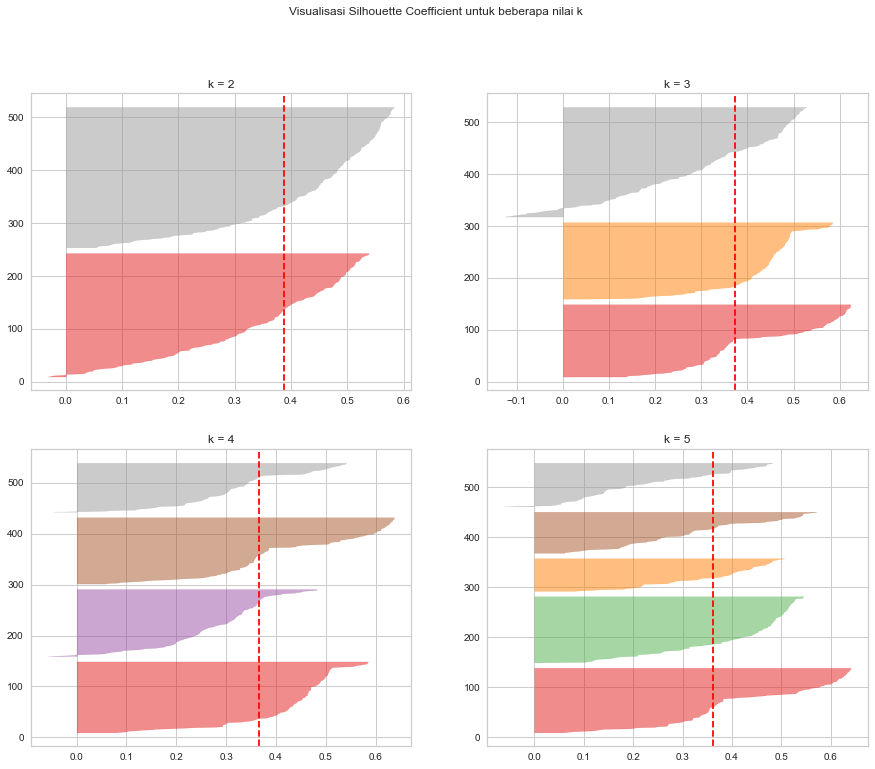

In [13]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_enc)

**Metrik Pendukung**
Metrik lain yang juga menjadi acuan untuk menentukan jumlah klaster adalah **Elbow Method**. Cara kerjanya adalah menampilkan plot inersia di berbagai nilai k yang menunjukkan seberapa baik klaster yang dihasilkan terhadap datanya. Pada nilai k yang tepat, akan muncul suatu "inflection point" di mana terjadi perubahan drastis pada gradien kurva.

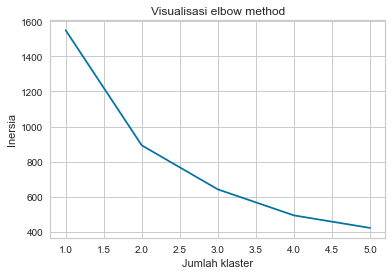

In [14]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Berdasarkan hasil metrik Silhouette Coeff. dan Elbow Method, data ini tidak menghasilkan klaster yang baik. Nilai $s(C)$ untuk `k = 2`, `k = 3`, `k = 4`, dan `k = 5` tidak jauh berbeda. Hal ini juga dibuktikan dari plot Elbow Method di atas: tidak ada inflection point yang perubahan gradiennya cukup drastis. Nilai K yang dipilih adalah `k = 2` karena nilai $s(C)$ untuk `k = 2` merupakan yang paling tinggi. Selain itu, perubahan gradien inersia di sebelah kiri `k = 2` paling drastis di antara keempat kandidat klaster

**Train Model**<br>
Latih model KMeans dengan memilih parameter cluster berdasarkan nilai k yang dipilih.

In [15]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_enc)

In [16]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_enc.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,1
1,-0.237632,-1.150565,1,1
2,0.952915,1.271677,2,0
3,-1.165702,-0.545004,2,1
4,0.325344,0.060556,3,0


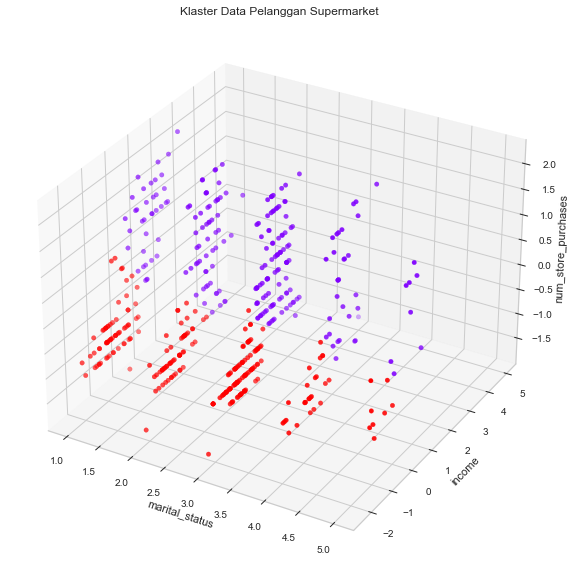

In [17]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['marital_status']
y = df_with_clusters['income']
z = df_with_clusters['num_store_purchases']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

> **Contoh interpretasi hasil**: Pada tiap kelas `marital_status` terdapat kedua jenis cluster, sehingga kelas `marital_status` tidak menentukan clustering secara signifikan. Di sisi lain, pola yang terlihat adalah cluster ungu selalu berada di kiri cluster merah. Ini menandakan bahwa atribut `income` merupakan pemisah utama. Cluster merah juga memiliki `num_store_purchases` yang lebih merata dibandingkan cluster ungu yang kebanyakan di bawah.

### Hierarchical (Agglomerative) Clustering
Berbeda dengan KMeans yang menentukan jumlah klaster kemudian mengevaluasinya, Agglomerative clustering mencari garis vertikal terpanjang yang menunjukkan pemisahan yang baik antara klaster yang terbentuk. Sebelum mengembangkan model untuk memprediksi klaster dari data, langkah pertama adalah menentukan jumlah klaster optimal berdasarkan visualisasi dendrogram.

Kita akan menggunakan dataset yang sama (`df_enc`) untuk pembuatan clustering hierarchical ini.

In [18]:
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_enc)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([307, 438, 499, 260, 342, 429, 367, 305, 497, 323, 310, 496, 357,
       421, 387, 295, 341, 493, 253, 451, 414, 495, 287, 435, 447, 266,
       368, 315, 280, 345, 351, 490, 316, 352, 296, 330, 376, 303, 349,
       445, 489, 401, 482, 249, 453, 491, 247, 263, 284, 293, 275, 257,
       297, 407, 424, 391, 397, 392, 462, 309, 255, 432, 365, 369, 317,
       418, 325, 413, 420, 422, 354, 416, 439, 476, 463, 264, 277, 466,
       443, 360, 436, 372, 474, 340, 302, 460, 409, 477, 398, 427, 198,
       175, 483, 390, 444, 492, 379, 262, 488, 380, 370, 389, 294, 465,
       415, 374, 411, 343, 478, 346, 431, 333, 417, 259, 450, 271, 308,
       258, 327, 467, 366, 322, 378, 400, 291, 388, 232, 468, 487, 375,
       383, 425, 441, 254, 464, 210, 326, 452, 217, 381, 384, 486, 243,
       162, 412, 290, 471, 475, 498, 406, 300, 473, 328, 157, 481, 449,
       371, 324, 225, 289, 184, 386, 183, 244, 448, 428, 359, 278, 399,
       306, 182, 238, 131, 298, 461, 208, 265, 240, 470, 394, 18

In [19]:
# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

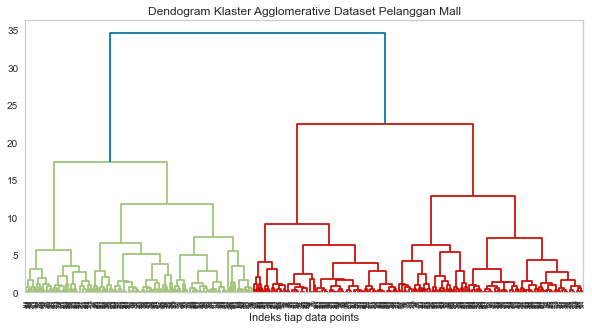

In [20]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.show()

Secara rule-of-thumb, garis biru merupakan jumlah k yang optimal. Namun, berdasarkan dendogram yang dibentuk, data ini tidak menghasilkan klaster yang baik: panjang garis biru dan merah sebenarnya tidak jauh berbeda. Idealnya, garis biru akan jauh lebih panjang daripada garis-garis lainnya dan kita akan lebih mudah membuat batas threshold seperti di bawah ini.

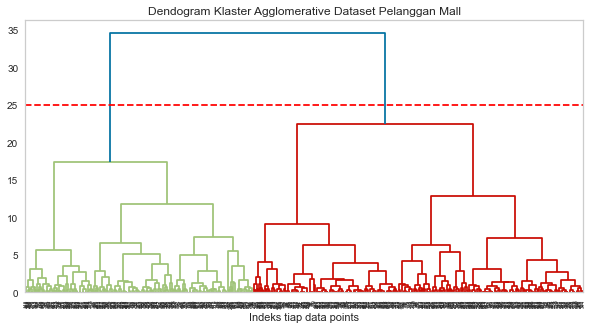

In [21]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 25, color = 'red', linestyle = 'dashed')
plt.show()

Selanjutnya, kita bisa membuat model Agglomerative Clustering dengan nilai k yang didapatkan sebelumnya. Setelah itu, visualisasikan hasil modelnya.

In [22]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_enc)

In [23]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_enc.copy())
df_with_clusters_agg['cluster'] = cluster_assignment2
df_with_clusters_agg.head()

,income,num_store_purchases,marital_status,cluster
0,0.318042,-0.545004,1,0
1,-0.237632,-1.150565,1,0
2,0.952915,1.271677,2,1
3,-1.165702,-0.545004,2,0
4,0.325344,0.060556,3,1


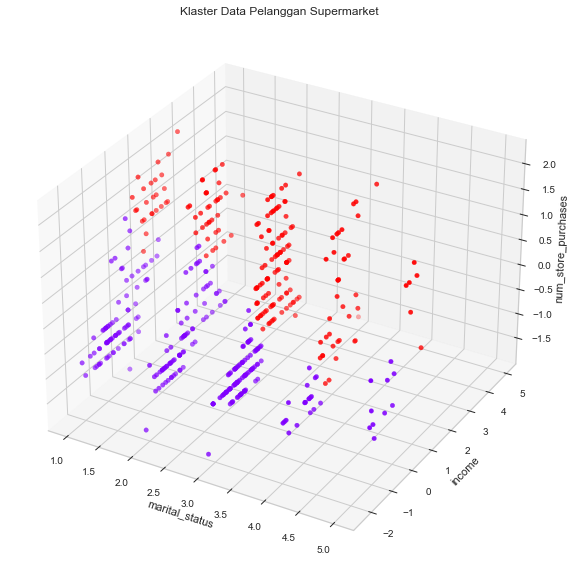

In [24]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['marital_status']
y = df_with_clusters_agg['income']
z = df_with_clusters_agg['num_store_purchases']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('marital_status')
ax.set_ylabel('income')
ax.set_zlabel('num_store_purchases')

plt.show()

## Latihan Clustering
### Deskripsi Dataset

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CUST_ID                    | ID pelanggan (Kategorikal)                 |
| BALANCE              | Saldo rekening pelanggan                |
| BALANCE_FREQUENCY  | Seberapa sering saldonya ter-update (1 = sering, 0 tidak) |
| PURCHASES                | Jumlah total pembelian        |
| ONEOFF_PURCHASES                | Jumlah pembelian maksimum        |
| INSTALLMENTS_PURCHASES                | Jumlah pembelian untuk kredit       |
| CASH_ADVANCE   | Uang tunai yang diberikan oleh pengguna        |
| PURCHASES_FREQUENCY  | Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)   |
| ONEOFFPURCHASESFREQUENCY  | Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = jarang dibeli)   |
| PURCHASESINSTALLMENTSFREQUENCY   | Seberapa sering pembelian dalam angsuran dilakukan (1 = sering dilakukan, 0 = jarang dilakukan) |
| CASHADVANCEFREQUENCY   | Seberapa sering uang tunai di muka dibayar   |
| CASHADVANCETRX   | Jumlah Transaksi yang dilakukan dengan CASH_ADVANCE   |
| PURCHASES_TRX     | Jumlah transaksi pembelian yang dilakukan              |
| CREDIT_LIMIT     | Batas Kartu Kredit untuk pengguna              |
| PAYMENTS   | Jumlah Pembayaran yang dilakukan oleh pengguna    |
| MINIMUM_PAYMENTS   | Jumlah pembayaran minimum yang dilakukan oleh pengguna  |
| PRCFULLPAYMENT   | Persentase pembayaran penuh yang dibayarkan oleh pengguna   |
| TENURE   | Masa pelayanan kartu kredit bagi pengguna |
> Data diambil dari [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [25]:
# load dataset

df= pd.read_csv("CC GENERAL.csv")

In [26]:
df_tutu = pd.read_csv("CC GENERAL.csv")
df_tutu.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
# melihat informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
# melihat deskripsi statistik dataset
df.describe()
#DILIHAT DARI distribusi perubahan data dari 75% data ke 50% ke 25% ini ada jomplang di atnara tiap attribut. begitupun dengan nilai max dan mini mereka. jadi ini harus handle buat standarisasi memang

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Soal 1: Preprocess Dataset

a) Pada tahap preprocessing dataset, persiapan yang dilakukan setidaknya perlu melakukan hal berikut:
- Mengecek dan menangani *missing values* dan data duplikat
- Menangani *outlier*
- Melakukan standarisasi
- Melakukan encoding pada atribut kategorikal

b) Jelaskan metode standarisasi yang dipilih beserta alasan (dan referensinya jika ada)

In [29]:
# handle missing values and duplicate
df.isnull().sum()
#terdapat missing value di minimum payments -> let's check percentagenya dulu

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
#persentase missing value
df.isnull().sum()/df.shape[0]*100
#ada 3 persen dan 0.01 -> jadi lebih baik di drop saja


CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [31]:
#drop missing value
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)


In [32]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [33]:
df.isnull().sum()
#sudah tidak null

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

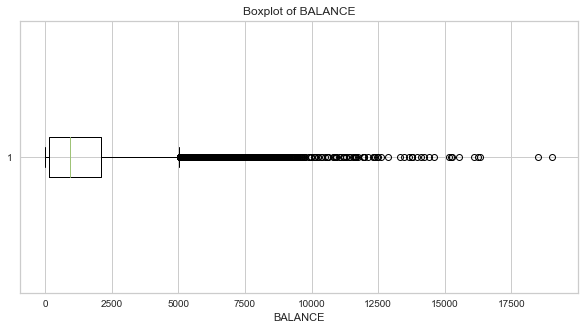

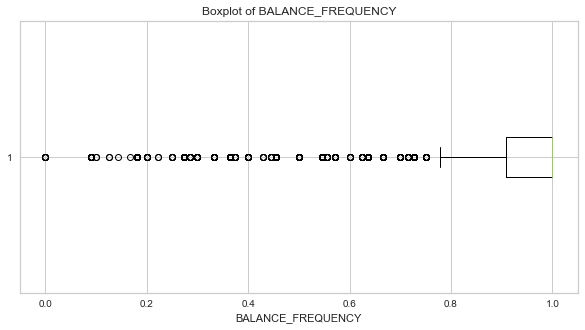

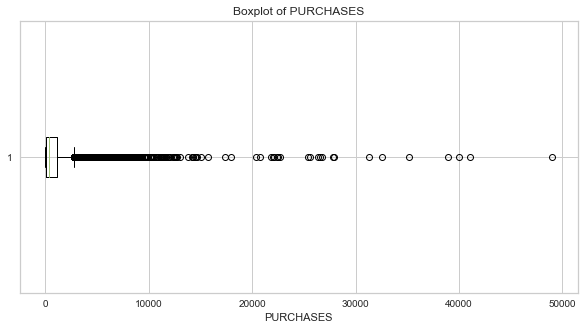

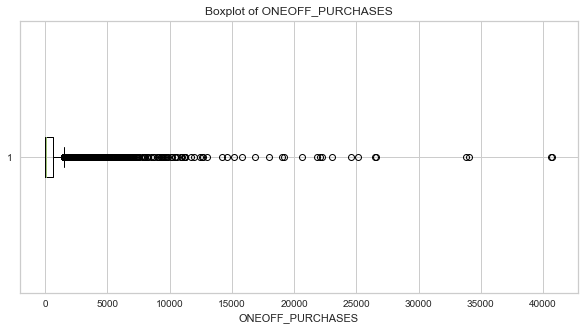

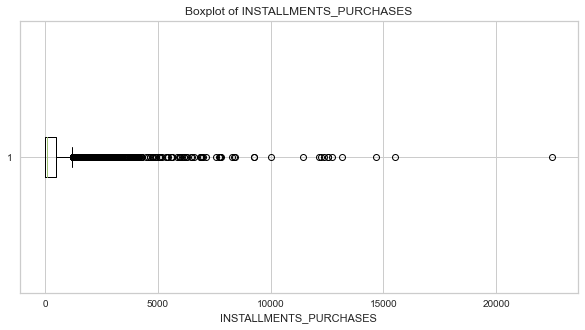

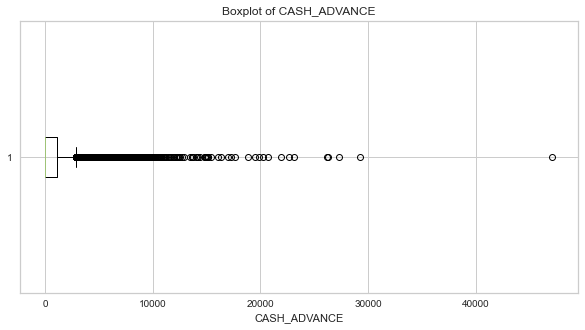

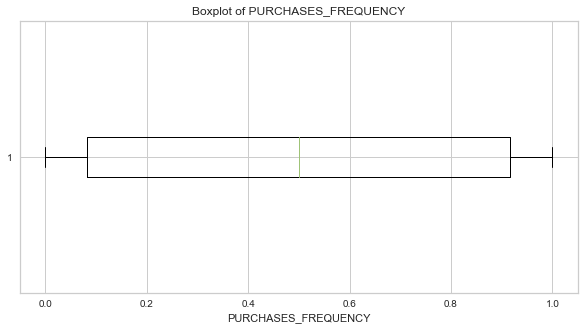

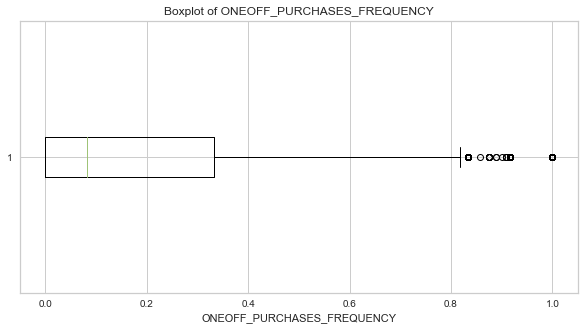

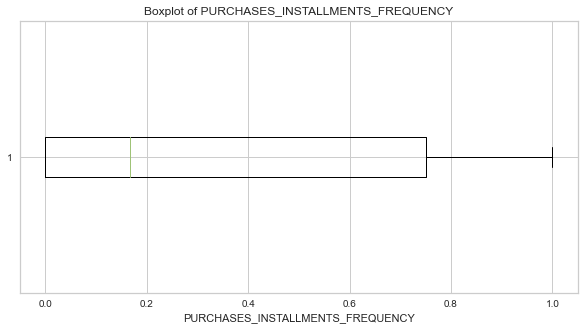

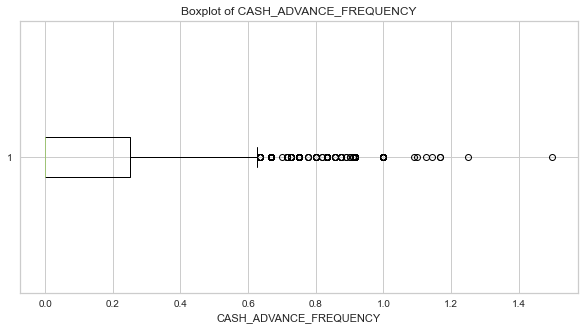

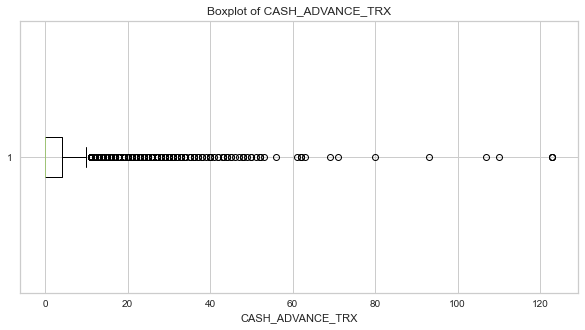

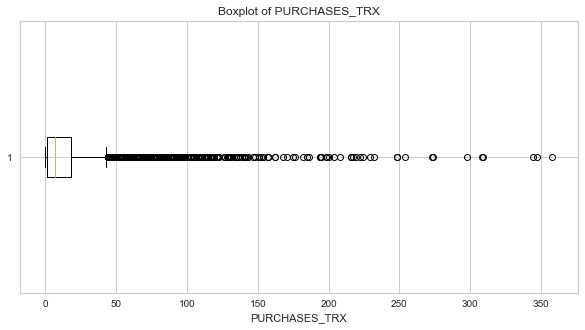

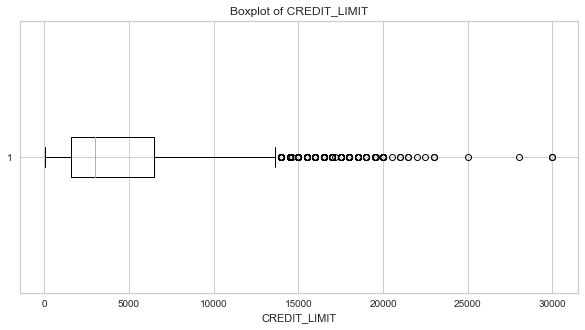

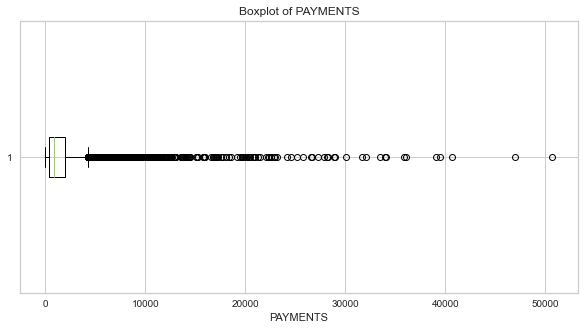

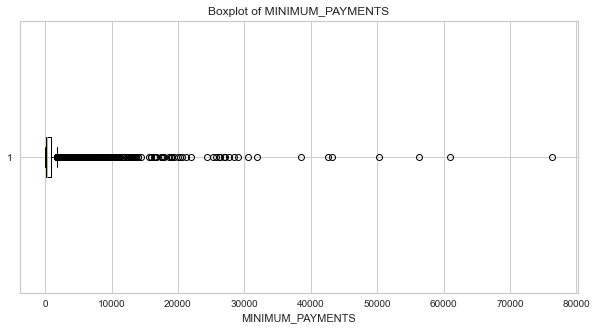

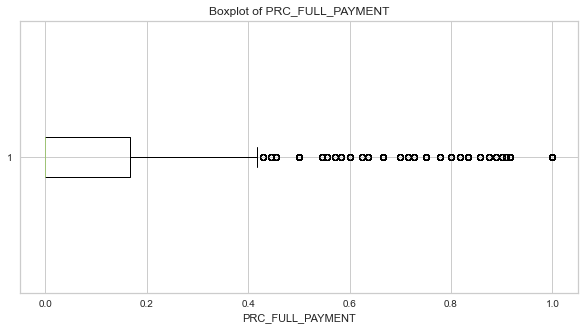

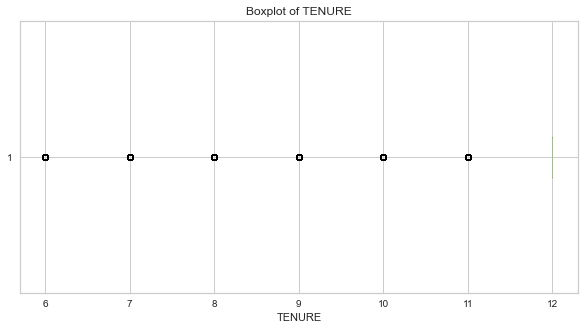

In [34]:
# handle outlier -> dari numerikal value dulu
# Daftar fitur numerikal
numerical_features = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
    'TENURE'
]

# Loop melalui setiap fitur numerikal dan buat boxplot
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[feature].dropna(), vert=False)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

#dari hasil boxplot ini bisa dilihat bahwa attribut itu punya outliers baik di atas batas atas maupun di bawah batas bawah , kecuali untuk fitur seprti PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY
#KALAU UNTUK tenure value countsnya cuman 7 saja jadi memang seperti itu graphnya kumpul di titik tertentu. 

In [35]:
a = df.describe()
numerical_features = a.columns
numerical_features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [36]:
# standarisasi dan alasan menggunakn standarisasi tersebut
from sklearn.preprocessing import RobustScaler, StandardScaler


#coba robust scaler
df_2 = df.copy()
scaler = RobustScaler()
df_2[numerical_features] = scaler.fit_transform(df_2[numerical_features])

#melihat distribusi data setelah di standarisasi
df.describe()




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [37]:
# encoding
#kategorikal fitur dulu apa saja
categorical_features = []
for i in df.columns:
    if i not in numerical_features:
        categorical_features.append(i)
print(categorical_features)


['CUST_ID']


In [38]:
#ga ada yang bisa diencode mengingat seperti nilai 1 dan 0 -> ada kata "antara" -> jadi ini bisa saja berarti pembelian angsurang frekunesinya rendah 
#kalau begitu drop cust_id saja 
df.drop('CUST_ID', axis=1, inplace=True)

> Saya awalnya mencoba menggunakan robustscaler,karena saya melihat outliersnya sangat banyak tersebar dalam rentang yang cukup besar untuk diatas batas atas box plotnya, oleh karena itu perhitungan scaler menggunakan mean dan standardeviasi sepertinya akan terlalu berpengaruh, dibandingkan dengan Robustscaler yang menggunakan IQR (Q3-Q1) dalam perhitungan. Namun, ketika saya run, beberapa attribut tetap memiliki nilai max yang sangat jomplang daripad attribut lainnya, sehingga saya memilih untuk menggunakan Standard Scaler, karena di clustering penyamaan kontribusi tiap fitur sangat penting. 

### Soal 2: K-Means Clustering

a) Buatlah dataset baru yang hanya memiliki fitur (kolom) pilihan. Pilih setidaknya 3 fitur, mencakup fitur numerik dan kategorikal, dan jelaskan alasan pemilihan fitur tersebut. Dataset ini akan digunakan untuk melakukan clustering

In [39]:
# membuat dataset baru
#saya mau melihat terlebih dahulu korelasi antar attribut



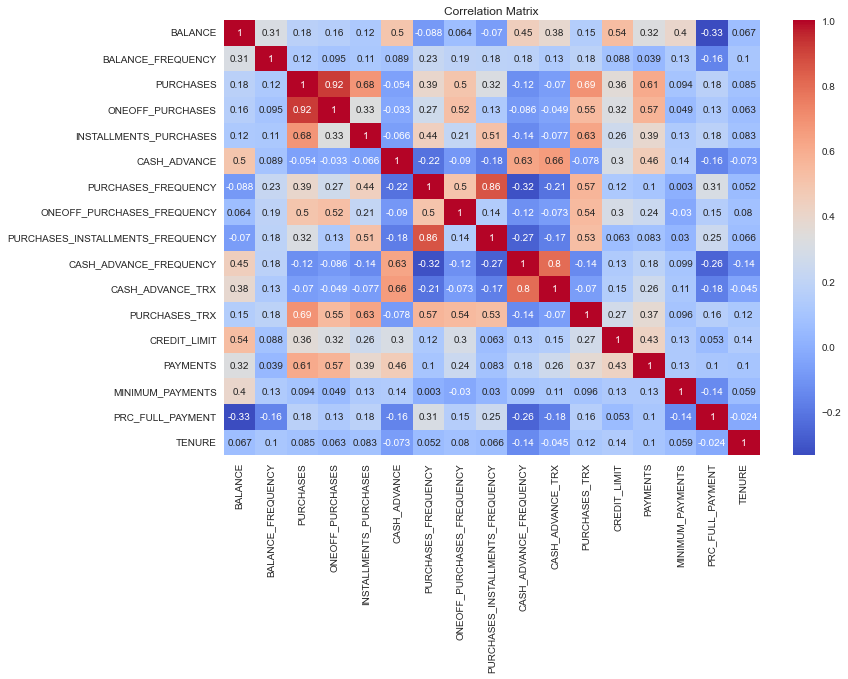

Highly correlated feature triplets (threshold > 0.4): [('ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'PURCHASES'), ('PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES'), ('CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE', 'BALANCE'), ('CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE'), ('PURCHASES_TRX', 'ONEOFF_PURCHASES', 'PURCHASES'), ('PURCHASES_TRX', 'INSTALLMENTS_PURCHASES', 'PURCHASES'), ('PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES'), ('PURCHASES_TRX', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES'), ('PURCHASES_TRX', 'ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES'), ('PURCHASES_TRX', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY'), ('PURCHASES_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'INSTALLMENTS_PURCHASES'), ('PURCHASES_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY'), ('PAYMENTS', 'ONEOFF_PURCHASES', 'PURCHASES')]


In [40]:
from itertools import combinations
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

threshold = 0.4  # Threshold untuk fitur yang korelasinya tinggi
high_correlation_triplets = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        for k in range(j):
            if abs(correlation_matrix.iloc[i, j]) > threshold and abs(correlation_matrix.iloc[i, k]) > threshold and abs(correlation_matrix.iloc[j, k]) > threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                colname_k = correlation_matrix.columns[k]
                high_correlation_triplets.append((colname_i, colname_j, colname_k))

print("Highly correlated feature triplets (threshold > 0.4):", high_correlation_triplets)


In [41]:
#buat kan saya list kombinasi berisi 3 fitur untuk data ini
feature_combinations = list(combinations(numerical_features, 3))
print("Number of combinations:", len(feature_combinations))
#tapi ini terlalu random -> saya mau tetap semua fitur tetap ke keep informasinya jadi let's take PCA 
#berarti coba brute force aja 
#dari 680 combinations ini make sure high_correlation_pairs tidak ada di satu kombinasi yang sama

Number of combinations: 680


In [42]:
valid_combinations = []
for comb in feature_combinations:
    valid = True
    for (feature1, feature2, feature3) in high_correlation_triplets:
        if feature1 in comb and feature2 in comb and feature3 in comb:
            valid = False
            break
    if valid:
        valid_combinations.append(comb)

print("Number of valid combinations:", len(valid_combinations))


Number of valid combinations: 667


In [43]:
#take random satu aja
list_valid = valid_combinations[0]

In [44]:
list_valid

('BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES')

Coba pakai PCA : waluapun ujungnya explained variancenya sangat kecil cuman 19%

Cumulative explained variance for 1 components: [0.27231177]
Cumulative explained variance for 2 components: [0.27231177 0.47605485]
Cumulative explained variance for 3 components: [0.27231177 0.47605485 0.56523818]
Cumulative explained variance for 4 components: [0.27231177 0.47605485 0.56523818 0.64097427]
Cumulative explained variance for 5 components: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045]
Cumulative explained variance for 6 components: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831]
Cumulative explained variance for 7 components: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019]
Cumulative explained variance for 8 components: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753]
Cumulative explained variance for 9 components: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753 0.8889545 ]
Cumulative explained variance for 10 components: [0.

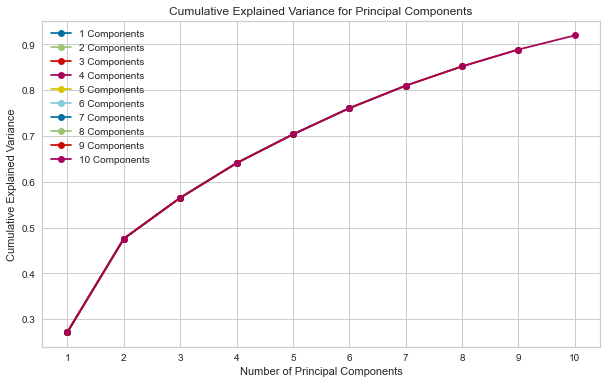

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Contoh data (ganti dengan data Anda)
# df = pd.read_csv('data.csv')

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# List untuk menyimpan explained variance ratios untuk setiap k dalam PCA
explained_variances = []

# Hitung explained variance untuk setiap jumlah komponen dari 1 hingga 10
for k in range(1, 11):
    pca = PCA(n_components=k)
    pca.fit(data_scaled)
    explained_variances.append(pca.explained_variance_ratio_)

# Plot explained variance untuk setiap principal component
plt.figure(figsize=(10, 6))
for k in range(1, 11):
    cumulative_explained_variance = np.cumsum(explained_variances[k-1])
    plt.plot(range(1, k + 1), cumulative_explained_variance, marker='o', label=f'{k} Components')
    print(f'Cumulative explained variance for {k} components: {cumulative_explained_variance}')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Principal Components')
plt.xticks(range(1, 11))  # Mengatur rentang sumbu x per 1 poin
plt.legend()
plt.grid(True)
plt.show()


In [46]:
#ambil cek kalau ambil 3 fitur itu -> jadinya berapa explained variance

# Menghitung cumulative explained variance untuk setiap komponen
cumulative_explained_variances = [0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045, 0.76086831,
                                            0.81003019, 0.85213753, 0.8889545, 0.91976958]
total = 0
for i in cumulative_explained_variance:
    total += i
print(total)
# Memilih explained variance dari komponen ke-3
# explained_variance_component_6 = np.sum([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045, 0.76086831])
#6 component saja sudah 49 persen 
#sedangkan 3 komponen baru 19 persen dan itu sangat kurang -> berarti pca sepertinya ga feasible disnii dah
explained_variance_component_3 = np.sum([0.27231177, 0.47605485, 0.56523818])
print(explained_variance_component_3)
# Menghitung nilai explained variance
nilai_explain = explained_variance_component_3 / total

print(f"Explained variance ratio of the 3rd component: {nilai_explain* 100}")



6.890079633297796
1.3136048
Explained variance ratio of the 3rd component: 19.065161361150626


In [47]:
#dataset baru 
list_valid = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES']
df_2 = df[list_valid]

In [48]:
df_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES
0,40.900749,0.818182,95.40
1,3202.467416,0.909091,0.00
2,2495.148862,1.000000,773.17
4,817.714335,1.000000,16.00
5,1809.828751,1.000000,1333.28
...,...,...,...
8943,5.871712,0.500000,20.90
8945,28.493517,1.000000,291.12
8947,23.398673,0.833333,144.40
8948,13.457564,0.833333,0.00


> Jadi saya menggunakan pendekatan cek korelasi tiap fitur yang triplets yang korelasinya melampaui 0.4, setelah itu saya mencari semua kombinasi fitur di df yang berangggotakan 3, dan memilih kombinasi pertama dari list kombinasi itu untuk digunakan sebagai dataset baru. Alasan pertama karena fitur yang korelasinya rendah satu sama lain dapat memungkinkan insight yang bagus daripada korelasi fitur yang saling berkaitan menyebabkan redundan, kedua saya mencoba PCA tetapi explained variancenya hanya 19% dari 100% variance data. Saya merasa sepertinya informasi lebih banyak jika saya ambil dari cara pertama saja daripada PCA.

b) Hitung dan visualisasikan nilai Silhouette Coefficient untuk dataset sebelumnya. Berikan interpretasi hasilnya

In [49]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_2)
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6412100039516091
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.6242776947130495
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.6331406507884779
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4934122395744724


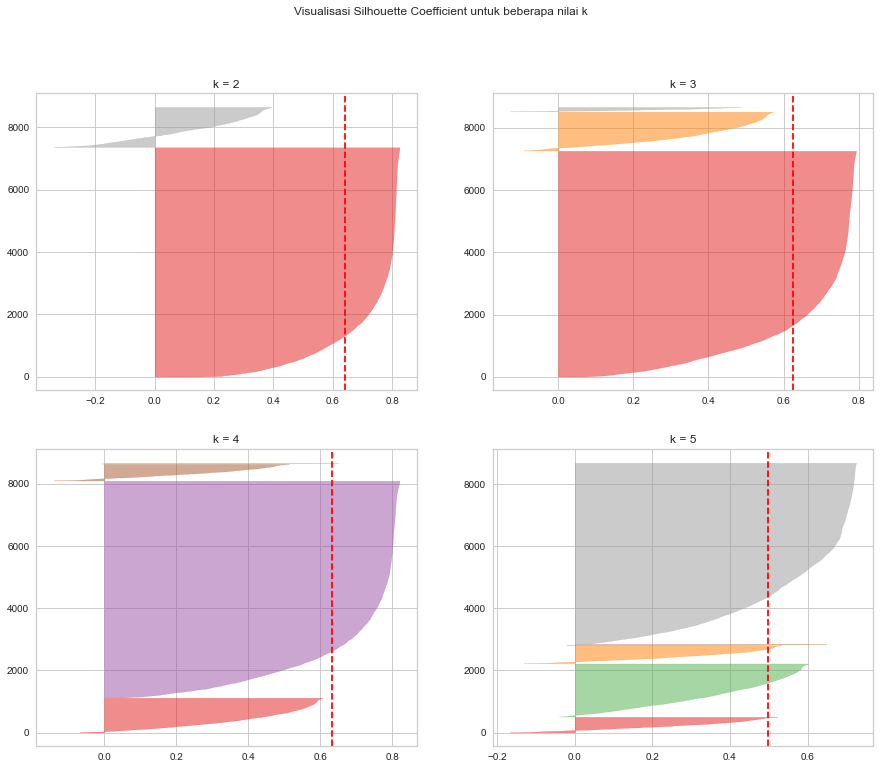

In [50]:
# visualisasi silhouette coefficient
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_2)

> Untuk K=2, kita mendapatkan dua cluster yang cukup baik. Cluster 1 (merah) memiliki nilai Silhouette Score sekitar 0.7, yang menunjukkan bahwa data dalam cluster ini sangat terkelompok dengan baik dan jauh dari cluster lain. Sementara itu, Cluster 2 (biru) memiliki nilai Silhouette Score sekitar 0.5, yang menunjukkan bahwa data dalam cluster ini kurang terkelompok dan lebih dekat dengan cluster 1. Meskipun cluster 1 terkelompok dengan sangat baik dan terpisah dari cluster 2, ada beberapa data di cluster 2 yang mendekati cluster 1, menunjukkan bahwa pemisahan cluster mungkin belum sempurna.

Dengan K=3, kita mendapatkan tiga cluster yang cukup baik. Cluster 1 (merah) memiliki nilai Silhouette Score sekitar 0.7, menunjukkan bahwa data dalam cluster ini sangat terkelompok dan jauh dari cluster lain. Cluster 2 (biru) dan Cluster 3 (hijau) memiliki nilai Silhouette Score sekitar 0.5, menunjukkan bahwa data dalam cluster ini kurang terkelompok dan lebih dekat satu sama lain. Meskipun cluster 1 terkelompok dengan sangat baik dan terpisah dari cluster 2 dan cluster 3, ada beberapa data di cluster 2 dan cluster 3 yang saling berdekatan, menunjukkan bahwa pemisahan cluster mungkin belum sempurna.

Dengan K=4, kita mendapatkan empat cluster yang cukup baik. Cluster 1 (merah) dan Cluster 2 (biru) memiliki nilai Silhouette Score sekitar 0.7, menunjukkan bahwa data dalam cluster ini sangat terkelompok dan jauh dari cluster lain. Sementara itu, Cluster 3 (hijau) dan Cluster 4 (ungu) memiliki nilai Silhouette Score sekitar 0.5, menunjukkan bahwa data dalam cluster ini kurang terkelompok dan lebih dekat satu sama lain. Meskipun cluster 1 dan cluster 2 terkelompok dengan baik dan terpisah dari cluster 3 dan cluster 4, ada beberapa data di cluster 3 dan cluster 4 yang saling berdekatan, menunjukkan bahwa pemisahan cluster mungkin belum sempurna.

Dengan K=5, kita mendapatkan lima cluster yang kurang baik. Cluster 1 (merah) dan Cluster 2 (biru) memiliki nilai Silhouette Score sekitar 0.6, menunjukkan bahwa data dalam cluster ini cukup terkelompok dan jauh dari cluster lain. Sementara itu, Cluster 3 (hijau), Cluster 4 (ungu), dan Cluster 5 (kuning) memiliki nilai Silhouette Score sekitar 0.4, menunjukkan bahwa data dalam cluster ini kurang terkelompok dan lebih dekat satu sama lain. Meskipun cluster 1 dan cluster 2 terkelompok dengan baik dan terpisah dari cluster lain, ada banyak data di cluster 3, cluster 4, dan cluster 5 yang saling berdekatan, menunjukkan bahwa pemisahan cluster tidak optimal.

Berdasarkan nilai Silhouette Score dan analisis visual, K=2 adalah pilihan terbaik untuk jumlah cluster dalam K-Means clustering ini. Nilai Silhouette Score yang tinggi dan visualisasi yang menunjukkan data yang terkelompok dengan baik mendukung kesimpulan ini.

c) Tampilkan visualisasi elbow method dengan suatu rentang nilai k (bisa berbeda) dan jelaskan perbandingannya dengan nilai Silhouette Coefficient yang didapatkan sebelumnya. Setelah itu, **pilih nilai k yang optimal** berdasarkan keduanya.

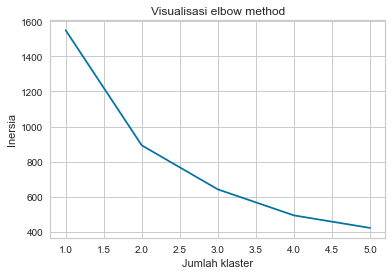

In [51]:
# elbow method
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

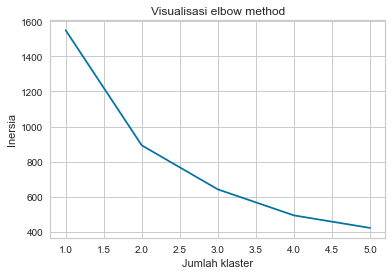

Sudut perubahan pada K=2: 179.86 derajat
Sudut perubahan pada K=3: 179.84 derajat
Sudut perubahan pada K=4: 179.58 derajat


In [52]:
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_enc)
    inertia.append(km.inertia_)


plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

# Menghitung sudut perpindahan tiap titik
def calculate_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

angles = []
for i in range(1, len(inertia) - 1):
    point_a = np.array([i, inertia[i-1]])
    point_b = np.array([i+1, inertia[i]])
    point_c = np.array([i+2, inertia[i+1]])
    angle = calculate_angle(point_a, point_b, point_c)
    angles.append(angle)
for i, angle in enumerate(angles):
    print(f'Sudut perubahan pada K={i+2}: {angle:.2f} derajat')

> Berdasarkan analisis Elbow Method, K=2 merupakan pilihan terbaik untuk jumlah cluster dalam K-Means clustering.
Pada K=4, kurva elbow menunjukkan penurunan WCSS yang signifikan, menunjukkan bahwa data tercluster dengan baik pada nilai K ini. Dilihat dari ketiganya tidak ada perubahan signifikan , tetapi perubahan dari dari k =1 ke k=2 lebih besar daripada kedua angle lainnya.

d) Latih model KMeans dengan **nilai k yang sudah ditentukan** sebelumnya. Visualisasikan hasil clustering dan berikan interpretasi hasilnya.

In [53]:
# latih
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_2)

In [54]:
# visualisasi

df_2with_clusters = pd.DataFrame(df_2.copy())
df_2with_clusters['cluster'] = assignment
df_2with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,cluster
0,40.900749,0.818182,95.40,0
1,3202.467416,0.909091,0.00,0
2,2495.148862,1.000000,773.17,0
4,817.714335,1.000000,16.00,0
5,1809.828751,1.000000,1333.28,0


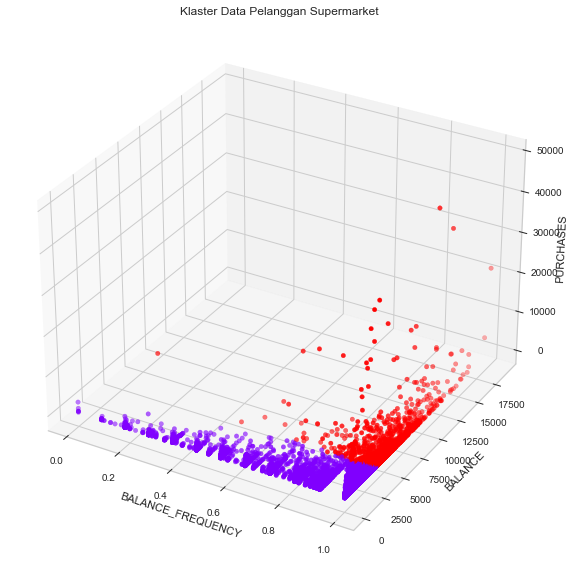

In [55]:
#visualisasikan
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_2with_clusters['BALANCE_FREQUENCY']
y = df_2with_clusters['BALANCE']
z = df_2with_clusters['PURCHASES']
cluster = df_2with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('BALANCE_FREQUENCY')
ax.set_ylabel('BALANCE')
ax.set_zlabel('PURCHASES')

plt.show()

In [56]:
a

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


> Dilihat dari visual, data terpisah dengan benar di sumbu balance, dengan nilai balance sebalh kiri nilia 5000 adalah kelas merah, dan setelah nilai 5000 adalah kelas biru. 
Untuk di balance frequency kelas tidak misah terutama setelah frequencynya antara 0.8 samapi 1. Begitupun dengan purchase semua data points berada di bawah, walaupun di range nilai tinggi seperti di nilai 40000 itu dari titik kluster ungu. 

### Soal 3: Hierarchical Clustering

a) Latih model Agglomerative clustering sementara tanpa menspesifikasikan jumlah cluster

In [57]:
# agglomerative clustering

# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = agglomerative.fit(df_2)

# Menampilkan label klaster tiap data points
cluster_assignment.labels_

array([6910, 7332, 5403, ...,    2,    1,    0], dtype=int64)

b) Tampilkan dendogram dan berikan interpretasinya. Selanjutnya, tentukan jumlah klaster (nilai k) yang optimal

In [58]:
# dendogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

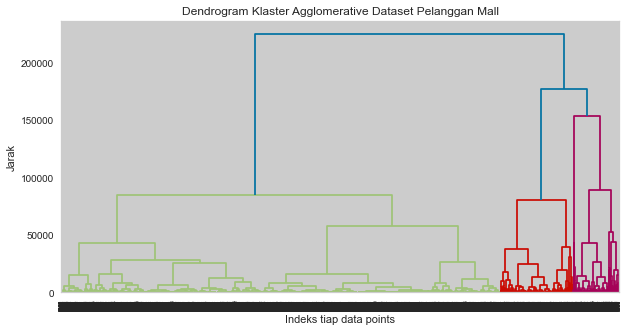

In [59]:
import scipy.cluster.hierarchy as shc

# Menghitung matriks linkage
linkage_matrix = shc.linkage(df_2, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title("Dendrogram Klaster Agglomerative Dataset Pelanggan Mall")
plt.xlabel("Indeks tiap data points")
plt.ylabel("Jarak")
shc.dendrogram(linkage_matrix)
plt.show()


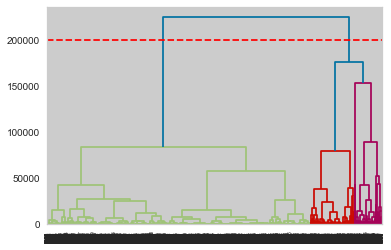

In [60]:
import scipy.cluster.hierarchy as shc

# # Menghitung matriks linkage
# linkage_matrix = shc.linkage(df_2, method='ward')

# # Plot dendrogram
# plt.figure(figsize=(10, 5))
# plt.title("Dendogram Klaster Agglomerative Dataset Pelanggan Mall")
# plt.xlabel("Indeks tiap data points")
# plt.ylabel("Jarak")
shc.dendrogram(linkage_matrix, truncate_mode=None)
plt.axhline(y=200000, color='red', linestyle='dashed')  # Menambahkan garis putus-putus pada tingkat pemotongan 25
plt.show()


> Bedasarkan dari grafik diatas di garis biru, terlihat bahwa k=2 merupakan peng-kelasan yang efektif. 

c) Latih model agglomerative clustering dengan nilai k yang sudah ditentukan sebelumnya. Visualisasikan hasil clustering dan bandingkan hasilnya dengan hasil clustering KMeans.

In [65]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2)
cluster_assignment2 = agglomerative.fit_predict(df_2)

In [66]:
# visualisasi

In [67]:
# Append hasil clustering ke dataframe
df_2with_clusters_agg = pd.DataFrame(df_2.copy())
df_2with_clusters_agg['cluster'] = cluster_assignment2
df_2with_clusters_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,cluster
0,40.900749,0.818182,95.40,1
1,3202.467416,0.909091,0.00,0
2,2495.148862,1.000000,773.17,1
4,817.714335,1.000000,16.00,1
5,1809.828751,1.000000,1333.28,1


Text(0.5, 0, 'PURCHASES')

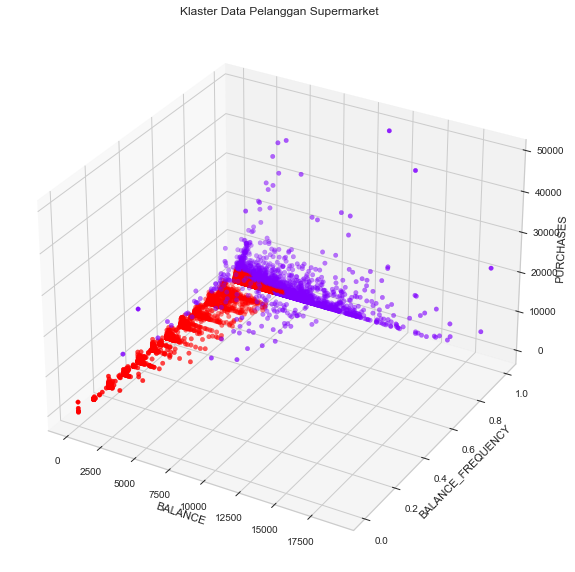

In [68]:
# Melakukan visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

y = df_2with_clusters_agg['BALANCE_FREQUENCY']
z = df_2with_clusters_agg['PURCHASES']
x = df_2with_clusters_agg['BALANCE']
cluster = df_2with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_ylabel('BALANCE_FREQUENCY')
ax.set_xlabel('BALANCE')
ax.set_zlabel('PURCHASES')


> Bisa dilihat jiak dicluster jadi 2 kelas,utnuk di sumbu balance (fiur balance) tidak terlalu membedakan antara cluster merah dan cluster ungu, karena keduanya menumpuk di sumbu balance dengan nilai 0 , walaupun bebreapa cluster ungu ada berada di rentang yang lebih besar dari nilai 2500 sampai 17500. Sedangkan untuk balance frequency cukup membagi data menjadi dua , dengan nilai 1 merupakan dominiasi cluster ungu, dan nilai di sebelah kirinilai 1 didominiasi oleh  kluster merah. Untuk sumbu purchases, tida sangat membagi karena semunay berada di bawah, walaupun beberapa titik data point cluster ungu ada di niali rentang lebih tinggi. 

### Soal 4: Latihan Teoretis
a) Jelaskan 2 metrik evaluasi yang digunakan dalam lab ini!
   > Pada lab ini saya menggunakan silhouette coefficient dan intertia (within-cluster sum of squares, wcss). Kedua metrik ini memberikan wawasan tentang seberapa baik data yang teleh dikelompokkan. Silhoutte coeficient digunakan untuk mengukur seberapa mirip sebuh data point dengan klasternya sendiri dibandingkan dengan klaster lain. Nilai ini antara -1 sampai 1, dengan nliai lebih tinggi artinya clusteringnya lebih baik. Hal ini dihitung dari rata-rata jarak antara titik tersebut dan semua titik lain dalam klaster yang sama (a), dan perhitugan rata-rata jarak antara titik tersebut dan semua titik dalam klaster terdekat yang berbeda (b). Nilai silhouette coefficient digunakan untuk keseluruhan dataset merupakan rata-rata niali silhouette untuk semua titik data. Sedangkan intertia, adalah mengukur seberapa kompak klaster tersebut atau seberapa dekat titik-titik data dengan centroid klaster mereka. Nilai inertia yang lebih rendah menunjukkan klaster yang lebih kompak.

b) Jelaskan cara menghitung intra-cluster similarity dan inter-cluster dissimilarity!
   > Intra-cluster (mengukur seberapa dekat titik-titik data dalams atu klaster, salah satu cara bisa menggunakan jarak Eucldian), dihitung centorid( titik tengah) dari klaster, lalu centroid adalah rata-rata dari semua titik data dalam klaster yagn mana n adalah jumlah titik data dalam klaster, dan xi adalah setiap titik data. Distance calculation merupakan perhitungan jarak antara setiap titik data dlaam kalster dengn cenrtorid klaster tersebut. Setelah mendapatkan Centorid, dan distance, maka kita menghitung intra cluster similarity denga mengrhitung jarka-jarka tersebut. Semakain kecil nlainya semkain baik karena menunjukkan bahwa titik-titik data lebih edkat satu sama lain dalam klaster. 
   > Inter-cluster Dissimjliarty ini menghitung seberapa jauh klaster satu dengan klaster lainnya. Hitung centroid untuk tiap klaster dan menghitung jarak antara centroid tiap pasangan klaster dengan jarak Euclidean. Setelh itu inter-cluster dissimiliarity didapat dari hasil ukur arata-rata jarak antara centroid-centroid klaster terdekat. 

c) K-Means adalah algoritma yang bekerja baik untuk data globular, tetapi tidak untuk data yang memiliki klaster sembarang. Apa yang akan terjadi apabila K-Means dipakai untuk kasus tersebut?
   > Jika k-means digunakan pada data yang memiliki klaster dalam bentuk sembarang (non-globular) maka hasil pengelompokkan mungkin tidak akurat dan tidak optimal, karena k-mena mislanya menggunakan jarak euclidean yang pengelompokkannya adlah klaster berbentuk bulat, jika klaster sebenarnya berbentuk elops, garis lengkung, atau punya distribusi yang tidak seragam, maka K-mean menjadi membagi klaster dengan tidak tepat. 

d) Jika kita menjalankan `sklearn.cluster.KMeans` berulang kali, apakah akan selalu didapatkan hasil yang sama?
   > Tidak, karena k-menas akan menginisialisasi centorid secara acak pada awal algoritma, jaid setiap kali algoritma dijalankan , centorid awal bisa berebda kecuali jika seed disetel secara eksplisti. Inisialisasi acak ini membuat solulsi lokal berbeda setiap kali dijalankan dan menghasilkan varias dalam pengelompokkan akhir. 

Referensi :https://medium.com/@Suraj_Yadav/understanding-intra-cluster-distance-inter-cluster-distance-and-dun-index-a-comprehensive-guide-a8de726f5769